In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_excel(r"/content/merged_data.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72289 entries, 0 to 72288
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   who_region                              72288 non-null  object 
 1   iso3                                    72289 non-null  object 
 2   country_name                            72289 non-null  object 
 3   city                                    72289 non-null  object 
 4   year                                    72289 non-null  int64  
 5   version                                 40098 non-null  object 
 6   pm10_concentration                      28672 non-null  float64
 7   pm25_concentration                      21730 non-null  float64
 8   no2_concentration                       26934 non-null  float64
 9   pm10_tempcov                            22403 non-null  float64
 10  pm25_tempcov                            16590 non-null  fl

In [ ]:
df.shape

(72289, 30)

In [ ]:
df.size

2168670

In [ ]:
df.isnull().sum()

,0
who_region,1
iso3,0
country_name,0
city,0
year,0
version,32191
pm10_concentration,43617
pm25_concentration,50559
no2_concentration,45355
pm10_tempcov,49886


In [ ]:
df.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status
0,1_Afr,BEN,Benin,Cotonou/BEN,2019,"V6.0 (2023), V6.0 (2023)",NaN,NaN,98.960,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1_Afr,BEN,Benin,Cotonou/BEN,2020,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",9.1,7.7,129.635,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1_Afr,CMR,Cameroon,Bafoussam/CMR,2012,V3.0 (2016),105.0,67.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1_Afr,CMR,Cameroon,Bamenda/CMR,2012,V3.0 (2016),141.0,132.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1_Afr,CMR,Cameroon,Yaoude/CMR,2012,V3.0 (2016),65.0,49.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(columns=['version','Reference','Number and type of monitoring stations','Version of the database','Status','web_link'])

,who_region,iso3,country_name,city,year,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,...,population_source,latitude,longitude,who_ms,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%)
0,1_Afr,BEN,Benin,Cotonou/BEN,2019,NaN,NaN,98.960,NaN,NaN,...,"Imputed_from_UNWUP2018, Imputed_from_UNWUP2018",6.299147,2.332126,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1_Afr,BEN,Benin,Cotonou/BEN,2020,9.1,7.7,129.635,67.0,67.0,...,"Imputed_from_UNWUP2018, Imputed_from_UNWUP2018...",6.316953,2.361751,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1_Afr,CMR,Cameroon,Bafoussam/CMR,2012,105.0,67.0,NaN,NaN,NaN,...,Imputed_from_UNWUP2018,5.466700,10.416400,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1_Afr,CMR,Cameroon,Bamenda/CMR,2012,141.0,132.0,NaN,NaN,NaN,...,Imputed_from_UNWUP2018,5.933300,10.166700,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1_Afr,CMR,Cameroon,Yaoude/CMR,2012,65.0,49.0,NaN,NaN,NaN,...,old database,3.866700,11.516700,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72284,Western Pacific Region,VNM,Viet Nam,Nha Trang,2014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.00,NaN,NaN,NaN,NaN
72285,Western Pacific Region,VNM,Viet Nam,Nha Trang,2015,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.00,NaN,NaN,NaN,NaN
72286,Western Pacific Region,VNM,Viet Nam,Viet Tri,2013,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.00,NaN,NaN,NaN,NaN
72287,Western Pacific Region,VNM,Viet Nam,Viet Tri,2014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN


Numerical Features features_to_impute = ['pm10_concentration', 'pm25_concentration', 'no2_concentration',
                      'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']

In [ ]:
features_to_impute = ['pm10_concentration', 'pm25_concentration', 'no2_concentration',
                      'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov']
#numerical features

In [ ]:
#calculate AQI
def calculate_aqi(pm25, pm10, no2):
       """Calculates AQI based on pollutant concentrations (without temporal coverage)."""
       aqi = (pm25 * 0.5) + (pm10 * 0.3) + (no2 * 0.2)
       return aqi


df['AQI'] = df.apply(lambda row: calculate_aqi(row['pm25_concentration'],
                                                  row['pm10_concentration'],
                                                  row['no2_concentration']), axis=1)

In [ ]:
df.head(2)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status,AQI
0,1_Afr,BEN,Benin,Cotonou/BEN,2019,"V6.0 (2023), V6.0 (2023)",NaN,NaN,98.960,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1_Afr,BEN,Benin,Cotonou/BEN,2020,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",9.1,7.7,129.635,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507


In [ ]:
scaler = StandardScaler()

features_to_scale = ['pm10_concentration', 'pm25_concentration', 'no2_concentration',
                     'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'population',
                     'latitude', 'longitude']

# Scale the features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [ ]:
df.head(2)

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status,AQI
0,1_Afr,BEN,Benin,Cotonou/BEN,2019,"V6.0 (2023), V6.0 (2023)",NaN,NaN,3.099233,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1_Afr,BEN,Benin,Cotonou/BEN,2020,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",-0.707876,-0.653583,4.286136,-1.071772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507


In [ ]:
#split of data
X_train, X_test, y_train, y_test = train_test_split(df, df['AQI'], test_size=0.3, random_state=42)

In [ ]:
Q1 = df['pm25_concentration'].quantile(0.25)
Q3 = df['pm25_concentration'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df = df[(df['pm25_concentration'] >= lower_bound) & (df['pm25_concentration'] <= upper_bound)]

In [ ]:
mean = df['pm25_concentration'].mean()
std = df['pm25_concentration'].std()

In [ ]:
df['zscore'] = (df['pm25_concentration'] - mean) / std

<ipython-input-17-eac20d86ea39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore'] = (df['pm25_concentration'] - mean) / std


In [ ]:
outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]

In [ ]:
outliers


,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status,AQI,zscore
62,1_Afr,ZAF,South Africa,Dr Kenneth Kaunda/ZAF,2019,"V5.0 (2022), V5.0 (2022), V5.0 (2022)",0.636307,1.388085,-0.232220,-4.326721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.9214,3.073754
184,1_Afr,ZAF,South Africa,Waterberg/ZAF,2012,V5.0 (2022),1.868232,1.382653,-0.280199,-4.326721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.5462,3.063508
1980,2_Amr,CHL,Chile,Osorno/CHL,2016,"V4.0 (2018), V5.0 (2022)",0.877473,1.409297,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.113767
1984,2_Amr,CHL,Chile,Padre Las Casas/CHL,2015,"V4.0 (2018), V5.0 (2022)",1.055251,1.383282,-0.466737,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.3809,3.064694
2210,2_Amr,DOM,Dominican Republic,San Cristobal/DOM,2020,V6.0 (2023),1.105441,1.415072,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.124660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39419,6_Wpr,CHN,China,Zhushan Qu/CHN,2015,"V5.0 (2022), V5.0 (2022)",NaN,1.385683,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.069224
39427,6_Wpr,CHN,China,Zhuzhou/CHN,2018,"V5.0 (2022), V5.0 (2022), V5.0 (2022), V5.0 (2...",NaN,1.430109,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.153025
39444,6_Wpr,CHN,China,Zigong/CHN,2020,V6.0 (2023),NaN,1.364756,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.029750
39455,6_Wpr,CHN,China,Zunyi/CHN,2016,"V4.0 (2018), V5.0 (2022), V5.0 (2022), V5.0 (2...",1.319329,1.436799,0.508361,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.2300,3.165644


In [ ]:
# plt.figure(figsize=(8, 6))
# plt.boxplot(df['pm25_concentration'], vert=False, patch_artist=True)
# plt.title('Box Plot of PM2.5 Concentration')
# plt.xlabel('PM2.5 Concentration')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.boxplot(df['pm10_concentration'], vert=False, patch_artist=True)
# plt.title('Box Plot of PM2.5 Concentration')
# plt.xlabel('PM2.5 Concentration')
# plt.show()

In [ ]:
import numpy as np

Q1 = df['pm10_concentration'].quantile(0.25)
Q3 = df['pm10_concentration'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df = df[(df['pm10_concentration'] >= lower_bound) & (df['pm10_concentration'] <= upper_bound)]

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.boxplot(df['pm10_concentration'], vert=False, patch_artist=True)
# plt.title('Box Plot of PM10 Concentration')
# plt.xlabel('PM10 Concentration')
# plt.show()

In [ ]:
df.shape

(12633, 32)

In [ ]:
# correlation_matrix = df.corr()

# # Create a heatmap
# plt.figure(figsize=(10, 8))  # Adjust figure size if needed
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
#heat map -1
# numerical_df = df.select_dtypes(include=np.number)
# correlation_matrix = numerical_df.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap (Numerical Features)')
# plt.show()

In [ ]:
# #hostogram ppm 25
# #no significant inference can be drawn
# plt.figure(figsize=(8, 6))
# plt.hist(df['pm25_concentration'], bins=60000, edgecolor='black')
# plt.title('Distribution of PM2.5 Concentration')
# plt.xlabel('PM2.5 Concentration')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
#box plot ppm 10
# plt.figure(figsize=(8, 6))
# plt.boxplot(df['pm10_concentration'], vert=False, patch_artist=True)
# plt.title('Distribution of PM10 Concentration')
# plt.xlabel('PM10 Concentration')
# plt.show()

In [ ]:
# #boxplot aqi
# plt.figure(figsize=(8, 6))
# plt.boxplot(df['AQI'], vert=False, patch_artist=True)
# plt.title('Distribution of AQI')
# plt.xlabel('AQI')
# plt.show()

#blank graph was plotted

In [ ]:
#histogram no2 concentration
# plt.figure(figsize=(8, 6))
# plt.hist(df['no2_concentration'], bins=5000, edgecolor='black')
# plt.title('Distribution of NO2 Concentration')
# plt.xlabel('NO2 Concentration')
# plt.ylabel('Frequency')
# plt.show()

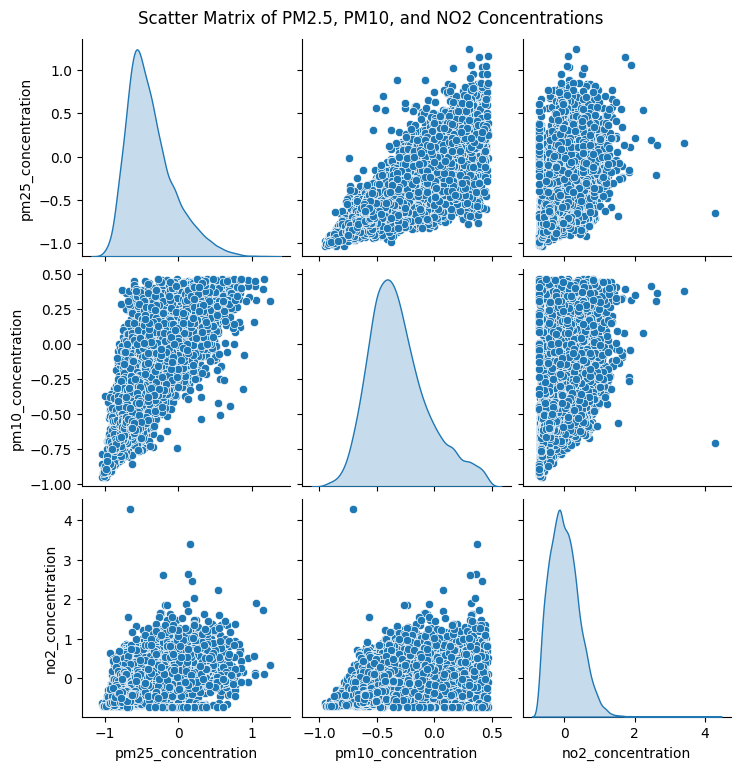

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pollutants = ['pm25_concentration', 'pm10_concentration', 'no2_concentration']
sns.pairplot(df[pollutants], kind='scatter', diag_kind='kde')
plt.suptitle('Scatter Matrix of PM2.5, PM10, and NO2 Concentrations', y=1.02)
plt.show()

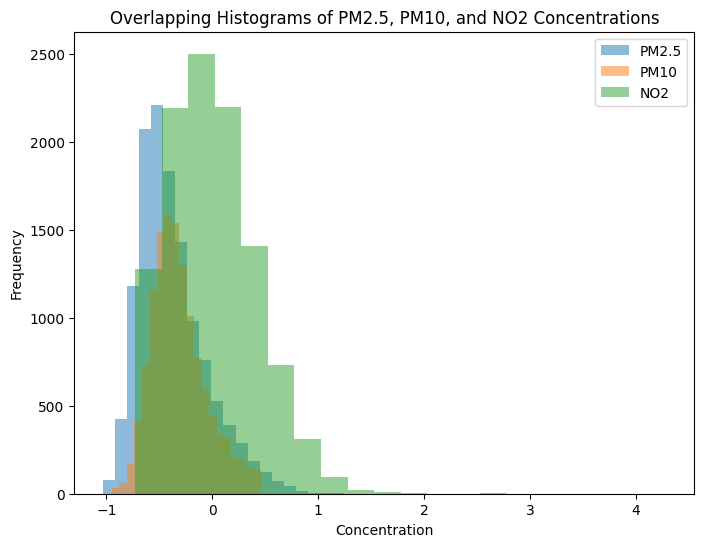

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['pm25_concentration'], bins=20, alpha=0.5, label='PM2.5')
plt.hist(df['pm10_concentration'], bins=20, alpha=0.5, label='PM10')
plt.hist(df['no2_concentration'], bins=20, alpha=0.5, label='NO2')
plt.title('Overlapping Histograms of PM2.5, PM10, and NO2 Concentrations')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.violinplot(data=df[['pm25_concentration', 'pm10_concentration', 'no2_concentration']])
# plt.title('Violin Plots of PM2.5, PM10, and NO2 Concentrations')
# plt.ylabel('Concentration')
# plt.show()

In [ ]:
# plt.figure(figsize=(8, 6))
# plt.boxplot([df['pm25_concentration'], df['pm10_concentration'], df['no2_concentration']],
#             labels=['PM2.5', 'PM10', 'NO2'], patch_artist=True)
# plt.title('Boxplots of PM2.5, PM10, and NO2 Concentrations')
# plt.ylabel('Concentration')
# plt.show()

In [ ]:
#pm 25 by concentration
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='year', y='pm25_concentration', data=df)
# plt.xticks(rotation=90)
# plt.title('PM2.5 Concentration by Year')
# plt.xlabel('Country')
# plt.ylabel('PM2.5 Concentration')
# plt.show()

<ipython-input-36-57cbf6c6d85c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='pm25_concentration', data=df, palette="husl")


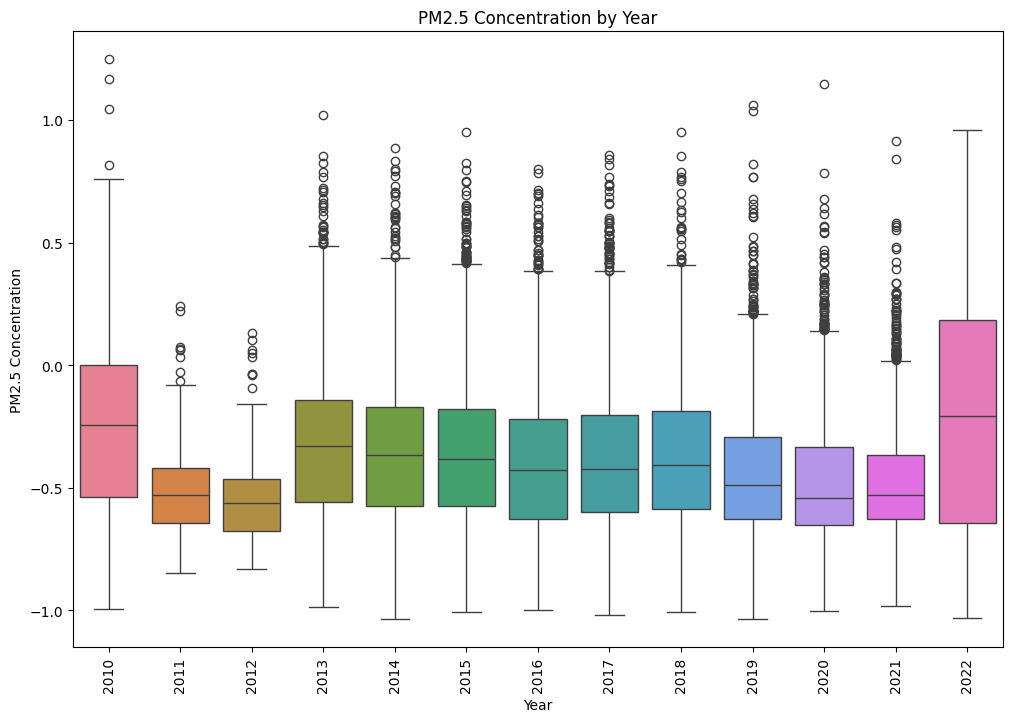

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='year', y='pm25_concentration', data=df, palette="husl")
plt.xticks(rotation=90)
plt.title('PM2.5 Concentration by Year')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration')
plt.show()

In [ ]:

# india_data = df[df['country_name'] == 'India']

# # Create boxplot for India
# plt.figure(figsize=(8, 6))  # Adjust figure size if needed
# sns.boxplot(y='pm25_concentration', data=india_data)
# plt.title('Distribution of PM2.5 Concentration in India')
# plt.ylabel('PM2.5 Concentration')
# plt.show()

In [ ]:

# india_data = df[df['country_name'] == 'India']

# cities = india_data['city'].unique()

# pm25_means = india_data.groupby('city')['pm25_concentration'].mean()
# pm10_means = india_data.groupby('city')['pm10_concentration'].mean()
# no2_means = india_data.groupby('city')['no2_concentration'].mean()

# # Set up bar positions
# bar_width = 0.25
# x_pos = np.arange(len(cities))


# plt.figure(figsize=(12, 8))
# plt.bar(x_pos, pm25_means, width=bar_width, label='PM2.5')
# plt.bar(x_pos + bar_width, pm10_means, width=bar_width, label='PM10')
# plt.bar(x_pos + 2 * bar_width, no2_means, width=bar_width, label='NO2')

# # Customize plot
# plt.xticks(x_pos + bar_width, cities, rotation=90)  # Rotate x-axis labels
# plt.title('Pollutant Concentrations in Indian Cities')
# plt.xlabel('City')
# plt.ylabel('Concentration')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
#bengaluru plot - not required
# city_data = df[(df['country_name'] == 'India') & (df['city'] == 'Bengaluru/IND')]

# pm25_mean = city_data['pm25_concentration'].mean()
# pm10_mean = city_data['pm10_concentration'].mean()
# no2_mean = city_data['no2_concentration'].mean()

# pollutants = ['PM2.5', 'PM10', 'NO2']
# means = [pm25_mean, pm10_mean, no2_mean]

# plt.figure(figsize=(8, 6))
# plt.bar(pollutants, means, color=['blue', 'green', 'red'])
# plt.title(f'Pollutant Concentrations in Agra, India')
# plt.ylabel('Concentration')
# plt.show()



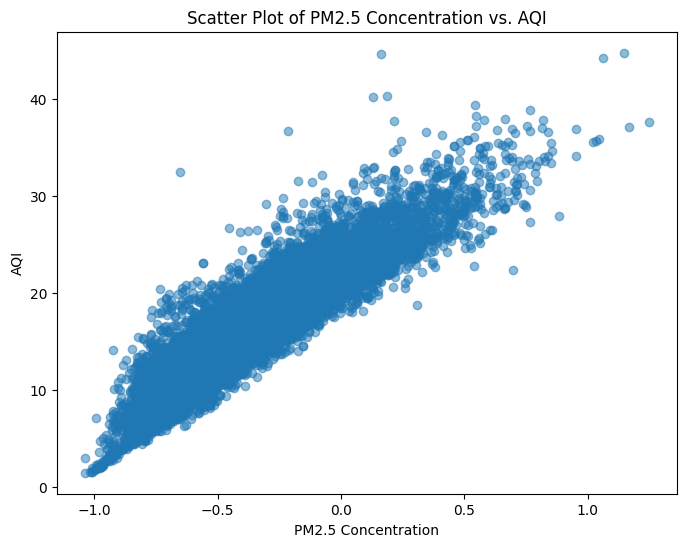

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['pm25_concentration'], df['AQI'], alpha=0.5)
plt.title('Scatter Plot of PM2.5 Concentration vs. AQI')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('AQI')
plt.show()

<ipython-input-42-a98a7643c3bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='who_region', y='AQI', data=df,palette="husl")


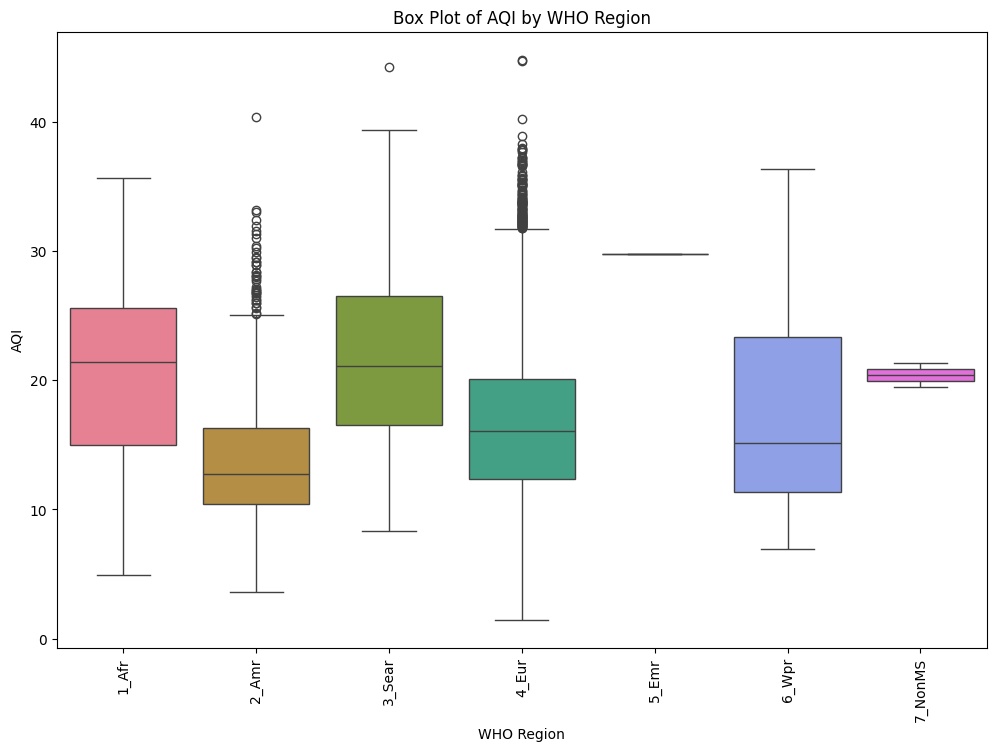

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='who_region', y='AQI', data=df,palette="husl")
plt.xticks(rotation=90)
plt.title('Box Plot of AQI by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('AQI')
plt.show()

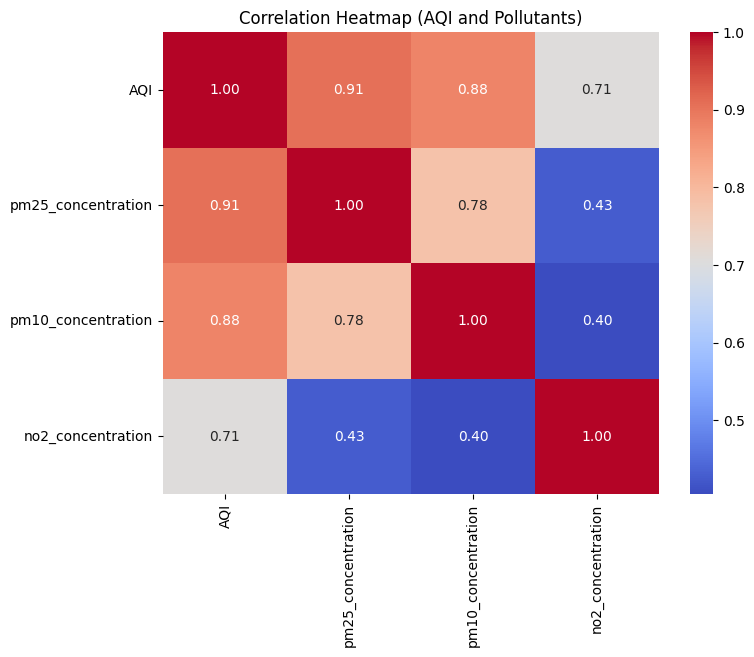

In [ ]:
cols_for_corr = ['AQI', 'pm25_concentration', 'pm10_concentration', 'no2_concentration']
correlation_matrix = df[cols_for_corr].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (AQI and Pollutants)')
plt.show()

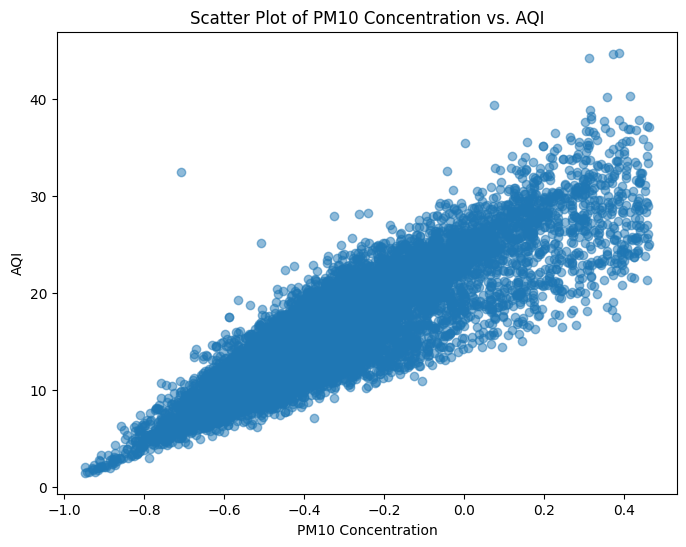

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['pm10_concentration'], df['AQI'], alpha=0.5)
plt.title('Scatter Plot of PM10 Concentration vs. AQI')
plt.xlabel('PM10 Concentration')
plt.ylabel('AQI')
plt.show()

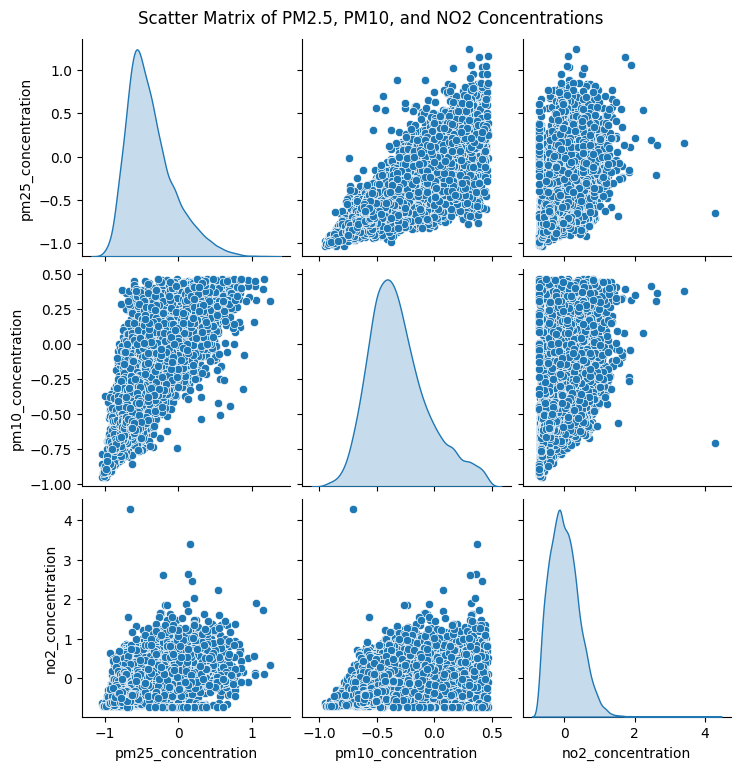

In [ ]:

pollutants = ['pm25_concentration', 'pm10_concentration', 'no2_concentration']
sns.pairplot(df[pollutants], kind='scatter', diag_kind='kde')  # diag_kind='kde' for kernel density estimation on the diagonal
plt.suptitle('Scatter Matrix of PM2.5, PM10, and NO2 Concentrations', y=1.02)
plt.show()

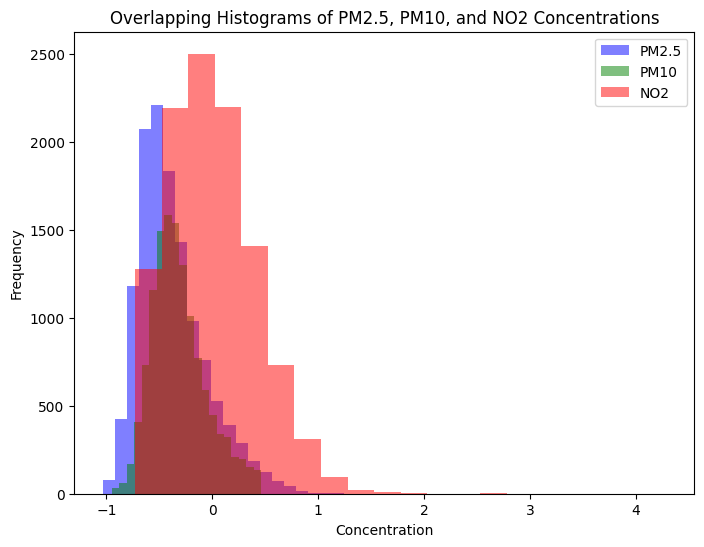

In [ ]:

plt.figure(figsize=(8, 6))
plt.hist(df['pm25_concentration'], bins=20, alpha=0.5, label='PM2.5', color='blue')
plt.hist(df['pm10_concentration'], bins=20, alpha=0.5, label='PM10', color='green')
plt.hist(df['no2_concentration'], bins=20, alpha=0.5, label='NO2', color='red')
plt.title('Overlapping Histograms of PM2.5, PM10, and NO2 Concentrations')
plt.xlabel('Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


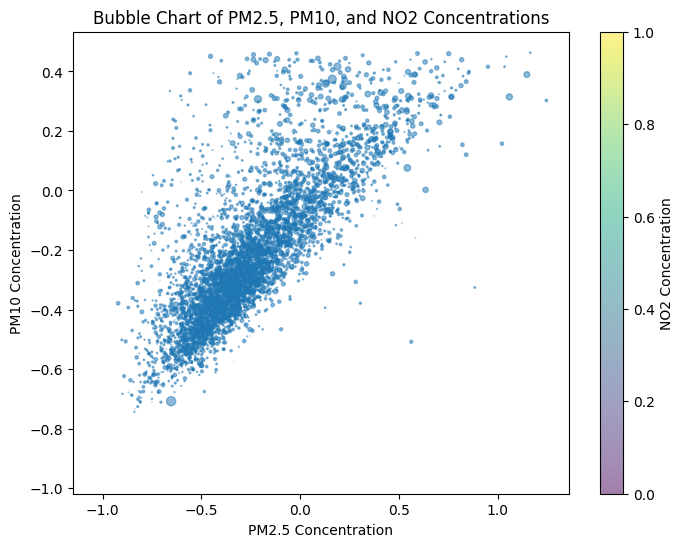

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['pm25_concentration'], df['pm10_concentration'], s=df['no2_concentration']*10, alpha=0.5)
plt.title('Bubble Chart of PM2.5, PM10, and NO2 Concentrations')
plt.xlabel('PM2.5 Concentration')
plt.ylabel('PM10 Concentration')
# Add a colorbar to represent NO2 concentration
plt.colorbar(label='NO2 Concentration')
plt.show()

In [ ]:
# #marginal histograms

# sns.jointplot(x=df['pm25_concentration'], y=df['pm10_concentration'], kind="kde", color="skyblue")
# plt.show()

In [ ]:
# sns.ecdfplot(data=df, x='pm25_concentration')


In [ ]:
# sns.jointplot(x='pm25_concentration', y='pm10_concentration', data=df)

In [ ]:
# sns.boxplot(x='who_region', y='pm25_concentration', data=df)

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,plot_acf(df['pm25_concentration'])

In [ ]:
# plt.plot(df['year'], df['pm25_concentration'])

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(df['pm25_concentration'])

# EDA FINISH
# MODEL TRAINING

In [ ]:

# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

In [ ]:

categorical_cols = ['who_region']


encoded_features = pd.get_dummies(df[categorical_cols], prefix=categorical_cols)
df = pd.concat([df, encoded_features], axis=1)
df = df.drop(columns=categorical_cols)


X = df.drop('AQI', axis=1)
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

categorical_cols = ['iso3']

encoded_features = pd.get_dummies(df[categorical_cols], prefix=categorical_cols)
df = pd.concat([df, encoded_features], axis=1)
df = df.drop(columns=categorical_cols)
X = df.drop('AQI', axis=1)
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# # 3. Split Data into Training and Testing Sets
# X = df.drop('AQI', axis=1)  # Features (excluding target variable)
# y = df['AQI']            # Target variable (AQI)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 4. Create and Train the Random Forest Model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # 5. Make Predictions on the Testing Set
# y_pred = rf_model.predict(X_test)

# # 6. Evaluate the Model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

In [ ]:
df.columns

Index(['country_name', 'city', 'year', 'version', 'pm10_concentration',
       'pm25_concentration', 'no2_concentration', 'pm10_tempcov',
       'pm25_tempcov', 'no2_tempcov',
       ...
       'iso3_SVN', 'iso3_SWE', 'iso3_THA', 'iso3_TTO', 'iso3_TUR', 'iso3_TZA',
       'iso3_UKR', 'iso3_URY', 'iso3_USA', 'iso3_ZAF'],
      dtype='object', length=112)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['AQI'] = imputer.fit_transform(df[['AQI']])[:, 0]

In [ ]:
#random forest model

# 2.
X = df[['pm10_concentration', 'pm25_concentration','no2_concentration']]
y = df['AQI']

# 3. spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

# 4. model traning
rf_model = RandomForestRegressor(n_estimators=100, random_state=80)
rf_model.fit(X_train, y_train)

# prediction and evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.04919203183672252
R-squared: 0.9984091400027576


In [ ]:
#random forest model

# 2.
X = df[['pm10_concentration', 'pm25_concentration']]
y = df['AQI']

# 3. spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

# 4. model traning
rf_model = RandomForestRegressor(n_estimators=100, random_state=80)
rf_model.fit(X_train, y_train)

# prediction and evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8.700371350694597
R-squared: 0.7186318144183393


In [ ]:
X = df[['pm25_concentration', 'pm10_concentration', 'no2_concentration']]
y = df['AQI']

In [ ]:
model = LinearRegression()

In [ ]:
Mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 8.700371350694597
R-squared: 0.7186318144183393


In [ ]:
df1= pd.read_csv(r"/content/ML_WHO_DATASET1.csv")

In [ ]:
def calculate_aqi(pm25, pm10, no2):
       """Calculates AQI based on pollutant concentrations (without temporal coverage)."""
       aqi = (pm25 * 0.5) + (pm10 * 0.3) + (no2 * 0.2)
       return aqi


df1['AQI'] = df1.apply(lambda row: calculate_aqi(row['pm25_concentration'],
                                                  row['pm10_concentration'],
                                                  row['no2_concentration']), axis=1)

In [ ]:
nan_count = df1['AQI'].isnull().sum()
print(f"Number of NaN values in AQI: {nan_count}")


Number of NaN values in AQI: 28234


In [ ]:
df1= df1.dropna(subset=['AQI'])

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='mean')
# y = imputer.fit_transform(y.values.reshape(-1, 1))[:, 0]
# x= df1[['pm10_concentration', 'pm25_concentration']]
# y= df1['AQI']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)  # Split data
# model.fit(X_train, y_train)

In [ ]:

x = df1[['pm10_concentration', 'pm25_concentration']]
y = df1['AQI']

imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))[:, 0]

del X
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)  # Split data

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse_lr = sqrt(mean_squared_error(y_test, y_pred))
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print ("root mean square error", rmse_lr)
print ("mean absolute error", mae_lr)
print ("r2 score", r2_lr)

root mean square error 2.193306646330872
mean absolute error 1.6846401314277788
r2 score 0.9777584941962082


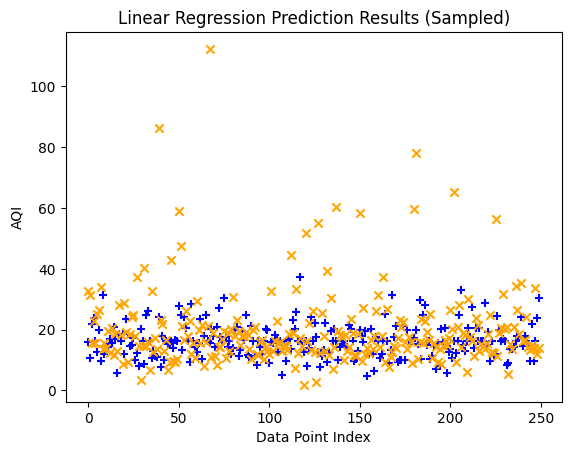

In [ ]:
sample_indices = random.sample(range(len(y_pred)), 250) # Change len(y_test) to len(y_pred)
y_test_sampled = [y_test.iloc[i] for i in sample_indices if i < len(y_test)]  # Add a check for valid index in y_test
y_pred_sampled = [y_pred[i] for i in sample_indices]

plt.scatter(range(len(y_test_sampled)), y_test_sampled, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(y_pred_sampled)), y_pred_sampled, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Data Point Index')
plt.ylabel('AQI')
plt.title('Linear Regression Prediction Results (Sampled)')
plt.show()

In [ ]:
#df1.head()

In [ ]:
df1.head()

,who_region,iso3,country_name,city,year,version,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,...,no2_tempcov,type_of_stations,reference,web_link,population,population_source,latitude,longitude,who_ms,AQI
0,4_Eur,ESP,Spain,A Coruna/ESP,2013.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...",23.238,11.491,28.841,87.0,...,93.0,"Urban, Urban, Suburban",NaN,NaN,246146.0,"manual, manual, manual, manual",43.367900,-8.418571,1,18.4851
1,4_Eur,ESP,Spain,A Coruna/ESP,2014.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)",27.476,15.878,19.575,96.0,...,95.0,"Urban, Urban, Suburban",NaN,NaN,247604.0,NaN,43.368033,-8.418233,1,20.0968
2,4_Eur,ESP,Spain,A Coruna/ESP,2015.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",25.515,14.004,22.731,98.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,19.2027
3,4_Eur,ESP,Spain,A Coruna/ESP,2016.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",23.057,13.160,20.204,98.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,17.5379
4,4_Eur,ESP,Spain,A Coruna/ESP,2017.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...",26.849,14.114,21.543,97.0,...,98.0,"Urban, Urban, Suburban, Suburban",NaN,NaN,247604.0,NaN,43.370375,-8.422900,1,19.4203


In [ ]:
#random forest model

# 2.
X = df1[['pm10_concentration', 'pm25_concentration']]
y = df1['AQI']

# 3. spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

# 4. model traning
rf_model = RandomForestRegressor(n_estimators=100, random_state=80)
rf_model.fit(X_train, y_train)

# prediction and evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.024911409092585
R-squared: 0.9728014919686936


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [ ]:
#random forest model
X = df1[['pm10_concentration', 'pm25_concentration']]
y = df1['AQI']

# 3. spliting data
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=80)

# 4. model traning
rf_model = RandomForestRegressor(n_estimators=100, random_state=80)
rf_model.fit(X_train, y_train)

# prediction and evaluation
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)
mae_rf = metrics.mean_absolute_error(y_test1, y_pred)
rmse_rf = sqrt(metrics.mean_squared_error(y_test1, y_pred))

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")

Mean Squared Error: 5.024911409092585
R-squared: 0.9728014919686936
Mean Absolute Error: 1.650959502059945
Root Mean Squared Error: 2.2416314168686577


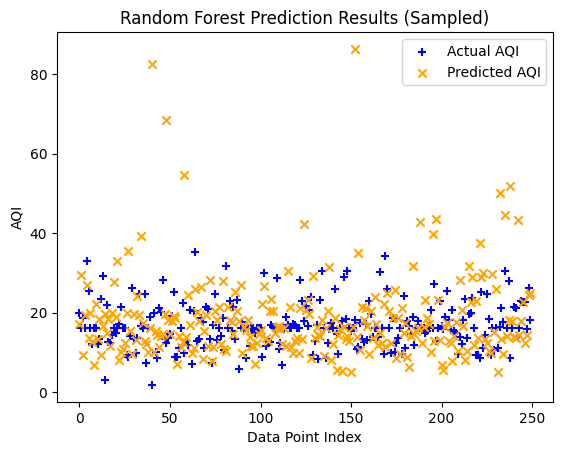

In [ ]:
sample_indices = random.sample(range(len(y_test1)), 250)

y_test_sampled = [y_test.iloc[i] for i in sample_indices]
y_pred_sampled = [y_pred[i] for i in sample_indices]

plt.scatter(range(len(y_test_sampled)), y_test_sampled, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(y_pred_sampled)), y_pred_sampled, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Data Point Index')
plt.ylabel('AQI')
plt.title('Random Forest Prediction Results (Sampled)')
plt.legend()
plt.show()


# Mean Squared Error: 5.024911409092585
# R-squared: 0.9728014919686936

In [ ]:
df2= pd.read_csv(r"/content/ML_WHO_DATASET1.csv")

In [ ]:
def calculate_aqi(pm25, pm10, no2):
       """Calculates AQI based on pollutant concentrations (without temporal coverage)."""
       aqi = (pm25 * 0.5) + (pm10 * 0.3) + (no2 * 0.2)
       return aqi


df2['AQI'] = df2.apply(lambda row: calculate_aqi(row['pm25_concentration'],
                                                  row['pm10_concentration'],
                                                  row['no2_concentration']), axis=1)

In [ ]:

# imputer = SimpleImputer(strategy='mean')
# df2['AQI'] = imputer.fit_transform(df2[['AQI']])[:, 0]

In [ ]:
# #random forest model


# X = df2[['pm10_concentration', 'pm25_concentration']]
# y = df2['AQI']

# # 3. spliting data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

# # 4. model traning
# rf_model = RandomForestRegressor(n_estimators=100, random_state=80)
# rf_model.fit(X_train, y_train)

# # prediction and evaluation
# y_pred = rf_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
X = df[['pm10_concentration', 'pm25_concentration']]
y = df['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

tree_model = DecisionTreeRegressor(random_state=80)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 3.744552381440509
Mean Absolute Error: 2.6396073859707188
R-squared: 0.5465420495712632


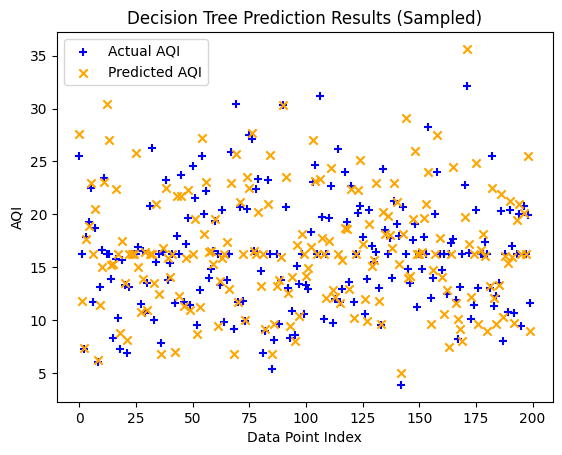

In [ ]:
import random
sample_indices = random.sample(range(len(y_test)), 200)
y_test_sampled = [y_test.iloc[i] for i in sample_indices]
y_pred_sampled = [y_pred[i] for i in sample_indices]
plt.scatter(range(len(y_test_sampled)), y_test_sampled, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(y_pred_sampled)), y_pred_sampled, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Data Point Index')
plt.ylabel('AQI')
plt.title('Decision Tree Prediction Results (Sampled)')
plt.legend()
plt.show()

#DATASPECIFIC TO INDIAN CITIES

In [ ]:
#data specific to indian cities

In [ ]:
df_india = pd.read_csv(r"/content/state_weather_aqi_data_mf2.csv")

In [ ]:
df_india.head()

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60,55,20,5,18,29,53,60,PM2.5


In [ ]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   state                  1565 non-null   object
 1   city                   1565 non-null   object
 2   station                1565 non-null   object
 3   date                   1565 non-null   object
 4   time                   1565 non-null   object
 5   PM2.5                  1565 non-null   int64 
 6   PM10                   1565 non-null   int64 
 7   NO2                    1565 non-null   int64 
 8   NH3                    1565 non-null   int64 
 9   SO2                    1565 non-null   int64 
 10  CO                     1565 non-null   int64 
 11  OZONE                  1565 non-null   int64 
 12  AQI                    1565 non-null   int64 
 13  Predominant_Parameter  1565 non-null   object
dtypes: int64(8), object(6)
memory usage: 171.3+ KB


In [ ]:
#root mean square log error
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0:
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return ((sum/len(predicted))**0.5)[0]

In [ ]:
x1 = df_india.iloc[:,:12].values
z1 = pd.DataFrame(x1)

y1 = df_india.iloc[:,12:13].values
z2 = pd.DataFrame(y1)

ohe = OneHotEncoder()
x_new1 = pd.DataFrame(ohe.fit_transform(x1[:,[0]]).toarray()) #state
x_new2 = pd.DataFrame(ohe.fit_transform(x1[:,[1]]).toarray()) #city
x_new3 = pd.DataFrame(ohe.fit_transform(x1[:,[2]]).toarray()) #station

feature_set = pd.concat([x_new1,x_new2,x_new3,pd.DataFrame(x1[:,5:12])],axis=1,sort=False)

x_train,x_test,y_train,y_test = train_test_split(feature_set,y1,test_size=0.25,random_state=0)


In [ ]:
mreg = LinearRegression()
mreg.fit(x_train,y_train)

mlr_y_predict = mreg.predict(x_test)

In [ ]:
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)
rmsle_mlr = rmsle(y_test,mlr_y_predict)

print(f"Error Metrics for Test data (MLR):\n rmse_mlr: {rmse_mlr} \n mae_mlr: {mae_mlr}\n r2_mlr: {r2_mlr}\n rmsle_mlr: {rmsle_mlr}")


Error Metrics for Test data (MLR):
 rmse_mlr: 5.497392778446417 
 mae_mlr: 3.4796704630794073
 r2_mlr: 0.9965384949142422
 rmsle_mlr: 0.05179769613896503


In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)

pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

In [ ]:
rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)
rmsle_pr = rmsle(y_test,pr_y_predict)

print(f"Error Metrics for Test data (PR):\n rmse_pr: {rmse_pr} \n mae_pr: {mae_pr}\n r2_pr: {r2_pr}\n rmsle_pr: {rmsle_pr}")


Error Metrics for Test data (PR):
 rmse_pr: 211.87590747642466 
 mae_pr: 81.58553052348931
 r2_pr: -4.141793017161186
 rmsle_pr: 0.4638974471870784


In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)

dt_y_predict = dec_tree.predict(x_test)

In [ ]:
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)
rmsle_dt = rmsle(y_test,dt_y_predict)

print(f"Error Metrics for Test data (DT):\n rmse_dt: {rmse_dt} \n mae_dt: {mae_dt}\n r2_dt: {r2_dt}\n rmsle_dt: {rmsle_dt}")

Error Metrics for Test data (DT):
 rmse_dt: 6.237027353161251 
 mae_dt: 2.354591836734694
 r2_dt: 0.9955443944501944
 rmsle_dt: 0.056314398388602166


In [ ]:
rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)

rt_y_predict = rt_reg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict))
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)
rmsle_rt = rmsle(y_test,rt_y_predict)

print(f"Error Metrics for Test data:\n rmse_rt: {rmse_rt} \n mae_rt: {mae_rt}\n r2_rt: {r2_rt}\n rmsle_rt: {rmsle_rt}")

Error Metrics for Test data:
 rmse_rt: 3.857722119201899 
 mae_rt: 1.7016479591836735
 r2_rt: 0.9982954359639727
 rmsle_rt: 0.042296296173332346


In [ ]:
#Evaluation on testing data
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_mlr,rmse_mlr,mae_mlr,rmsle_mlr))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(r2_pr,rmse_pr,mae_pr,rmsle_pr))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_dt,rmse_dt,mae_dt,rmsle_dt))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_rt,rmse_rt,mae_rt,rmsle_rt))

MLR	0.9965	5.4974	3.4797	0.0518
PR	-4.14	211.88	81.586	0.4639
DTR	0.9955	6.2370	2.3546	0.0563
RFR	0.9983	3.8577	1.7016	0.0423


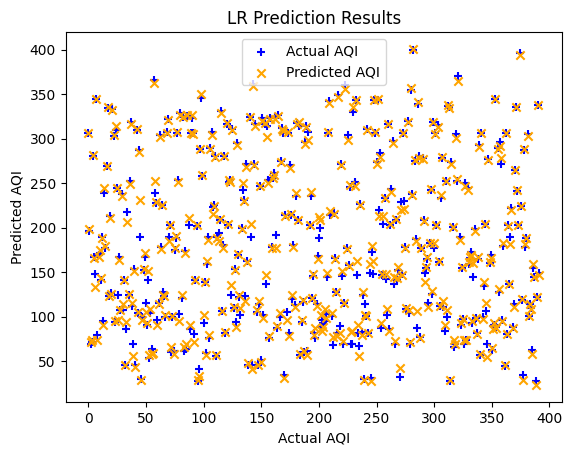

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(mlr_y_predict)), mlr_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('LR Prediction Results')
plt.legend()
plt.show()


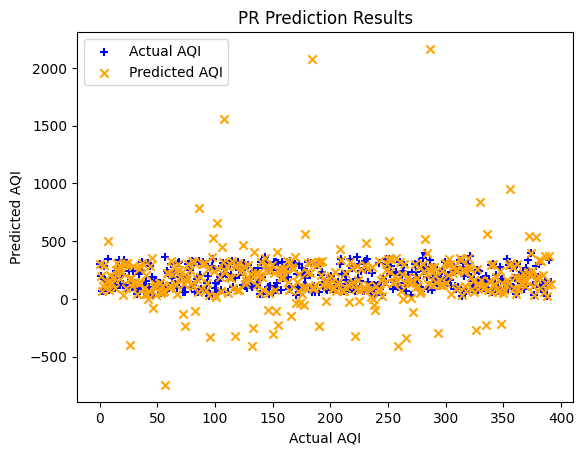

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(pr_y_predict)), pr_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('PR Prediction Results')
plt.legend()
plt.show()

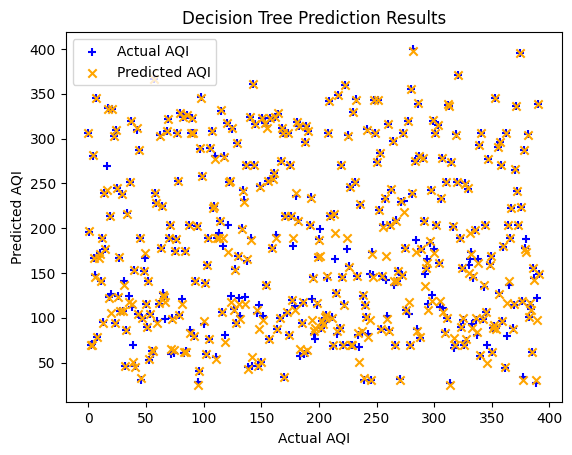

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(dt_y_predict)), dt_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Decision Tree Prediction Results')
plt.legend()
plt.show()

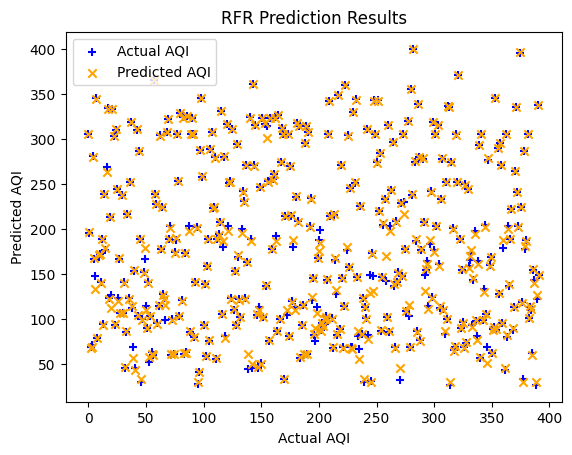

In [ ]:
plt.scatter(range(len(y_test)), y_test, c='blue', marker='+', label='Actual AQI')
plt.scatter(range(len(rt_y_predict)), rt_y_predict, c='orange', marker='x', label='Predicted AQI')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('RFR Prediction Results')
plt.legend()
plt.show()